c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

     bizness      0.901     0.897     0.899       233
    criminal      0.943     0.955     0.949       242
    izklaide      0.954     0.962     0.958       261
    politika      0.917     0.898     0.907       332
      sports      0.967     0.979     0.973       237

    accuracy                          0.936      1305
   macro avg      0.936     0.938     0.937      1305
weighted avg      0.935     0.936     0.935      1305



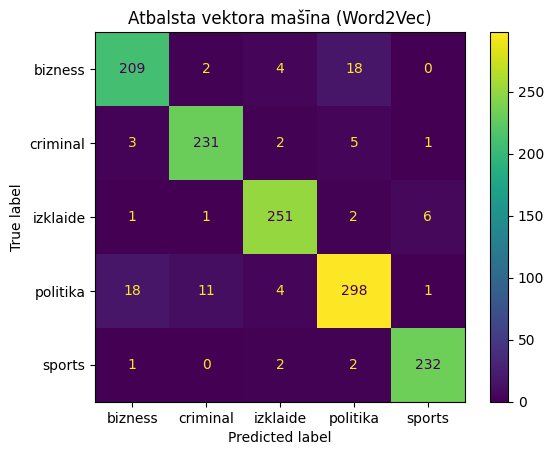

In [1]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import pickle
import spacy
import string
import json

punct = string.punctuation
stopwordsFile = open('stopwords-lv2.json', 'r', encoding="utf8")
stopwords_arr = json.load(stopwordsFile)
nlp = spacy.load("xx_ent_wiki_sm")

data_news = pd.read_json('5cat_big.json')
x_train, x_test, y_train, y_test = train_test_split(data_news['body'], data_news['category'], test_size=0.2, random_state=0)

def datu_prieksapstrade(raksts):
  doc = nlp(raksts)
  tokens = []
  for token in doc:
    temp = token.lower_
    tokens.append(temp)

  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords_arr and token not in punct:
      cleaned_tokens.append(token)
  return ' '.join(cleaned_tokens)

x_train = x_train.apply(datu_prieksapstrade)
x_test = x_test.apply(datu_prieksapstrade)

sentences = [sentence.split() for sentence in x_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)


x_train = np.array([vectorize(sentence) for sentence in x_train])
x_test = np.array([vectorize(sentence) for sentence in x_test])

clfNew = LinearSVC()
clfNew.fit(x_train, y_train)


def metrikasIzvade(clf, title):
	y_pred = clf.predict(x_test)
	cm = confusion_matrix(y_test, y_pred)
	accuracy = accuracy_score(y_test, y_pred)
	plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
	plot.plot()
	plot.ax_.set_title(title)
	print(classification_report(y_test, y_pred, digits=3))
	#Saglabājam cik veiksmīga bijusi klasifikācija, tabulu tālāk liksim iekš darba
	clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
	clsf_report.to_csv('Report' + title + '_'+ str(accuracy) + '.csv', index= True)
	#Saglabājam modeli
	pickle.dump(clf, open(title + '_'+ str(accuracy) +'.sav', 'wb'))
        
metrikasIzvade(clfNew, "Atbalsta vektora mašīna (Word2Vec)")